# Thực hành LAB 01

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Khảo sát về thuôc lá ở giới trẻ ở Mỹ
</div>

## Collaborators (Group 18)
- `21120359` - **Phạm Quang Tuyền**
- `21120434` - **Bùi Tiến Dũng**
- `21120300` - **Phan Thanh Hà Nguyên**
- `21120354` - **Lương Thanh Tú**



<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Visualization
</div>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('processed_data_tobacco.csv')

## Sự tương quan dữ liệu giữa các cột dạng số

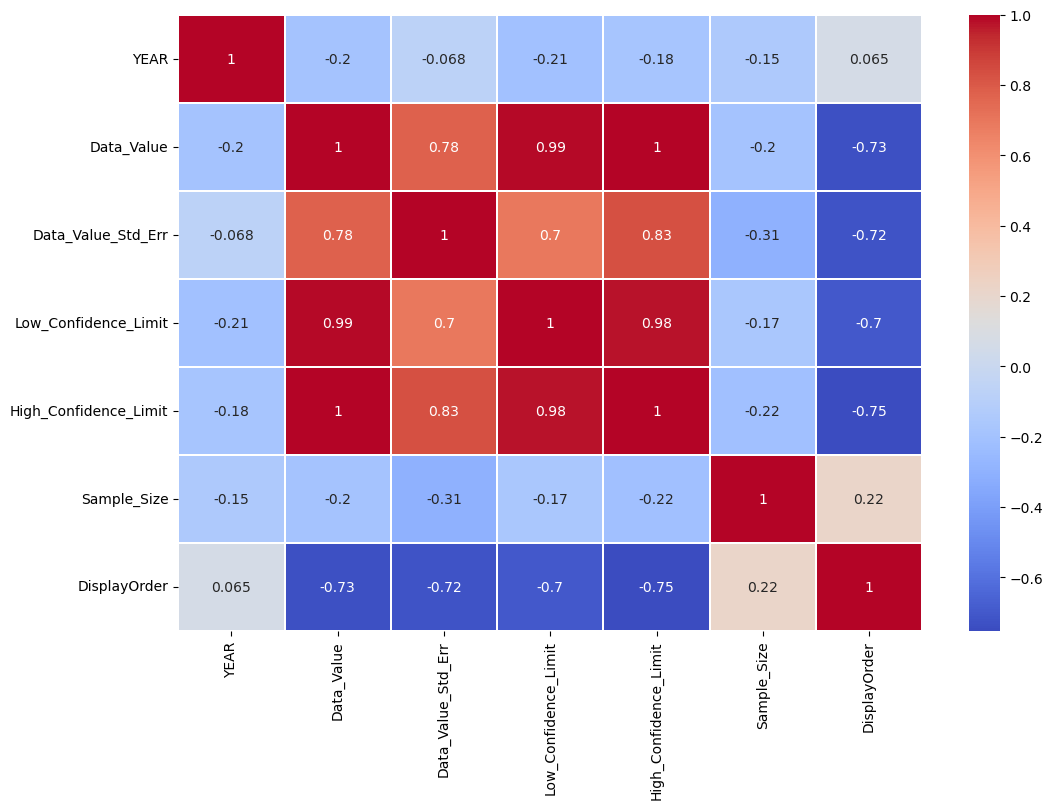

In [103]:
df_heatmap = df.copy().select_dtypes(include=['number'])

# Xoá các dòng có giá trị thiếu
df_heatmap = df_heatmap.dropna()

# vẽ heatmap
# Plotting heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

- Mối tương quan cao giữa `Tỷ lệ tiêu thụ thuốc lá (%) (Data_Value)` và mức dưới và mức trên của khoảng tin cậy (`Low_Confidence_Limit`, `High_Confidence_Limit`). Điều này có thể có nghĩa là tỷ lệ sử dụng thuốc lá tăng lên cùng với mức độ tin cậy vào tỷ lệ đó. 
- Điều này không có gì đáng ngạc nhiên vì khoảng tin cậy phần lớn được xác định bởi chính tỷ lệ phần trăm và sai số chuẩn của nó.

### Lọc dữ liệu các khảo sát sử dụng tobacco từ 2000-2016

#### Lọc ra dữ liệu chỉ có các trường hợp sử dụng tobacco

In [108]:
# Các trường hợp người khảo sát sử dụng tobbaco
tobacco_df = df.loc[df['TopicDesc'] != 'Cessation (Youth)'].copy()

#### Vì có nhiều bang cuộc khảo sát không được tiến hành trong thời gian dài nên ta sẽ lọc ra các bang có khảo sát từ 2000-2016

In [109]:
def filter_years(group):
    return (2000 in group['YEAR'].values) and (2016 in group['YEAR'].values)

filtered_data = tobbaco_df.groupby('LocationDesc').filter(filter_years)
filtered_data = filtered_data[filtered_data['YEAR'].isin(range(2000,2017))]
filtered_data

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
1,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS09,9
4,2004,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11
6,2014,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
8,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2004,WI,Wisconsin,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS07,7
9681,2004,WI,Wisconsin,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS08,8
9682,2006,WI,Wisconsin,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
9683,2006,WI,Wisconsin,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS09,9


## Top 5 bang có sự thay đổi hàng đầu về số lượng người sử dụng tobacco trong giai đoạn 2000-2016

#### Thêm cột giá trị từ phần trăm và số lượng mẫu thử (Data_Number)

In [110]:
filtered_data['Data_Number'] = filtered_data['Data_Value'] * filtered_data['Sample_Size'] / 100

In [111]:
# Lấy trung bình theo năm
avg_data_number = filtered_data.groupby(['LocationDesc','YEAR'])['Data_Number'].mean().reset_index()
avg_data_number

,LocationDesc,YEAR,Data_Number
0,Alabama,2000,213.836361
1,Alabama,2002,181.055083
2,Alabama,2004,172.375222
3,Alabama,2006,206.487028
4,Alabama,2008,129.761722
...,...,...,...
56,Wisconsin,2006,138.317861
57,Wisconsin,2008,133.813278
58,Wisconsin,2010,118.556917
59,Wisconsin,2012,80.151417


In [112]:
# Tìm top 5 dựa trên trung bình trong giai đoạn 2000-2016
top_5_locations = avg_data_number.groupby('LocationDesc')['Data_Number'].mean().nlargest(5).index
top_5_locations

Index(['Mississippi', 'Oklahoma', 'Indiana', 'Delaware', 'South Dakota'], dtype='object', name='LocationDesc')

In [113]:
filtered_locations_df = avg_data_number[avg_data_number['LocationDesc'].isin(top_5_locations)]
filtered_locations_df

,LocationDesc,YEAR,Data_Number
9,Delaware,2000,424.965972
10,Delaware,2002,251.640472
11,Delaware,2004,194.624611
12,Delaware,2008,137.229806
13,Delaware,2010,128.745556
14,Delaware,2012,126.574278
15,Delaware,2014,99.589028
16,Delaware,2016,71.976250
17,Indiana,2000,157.829917
18,Indiana,2004,251.615250


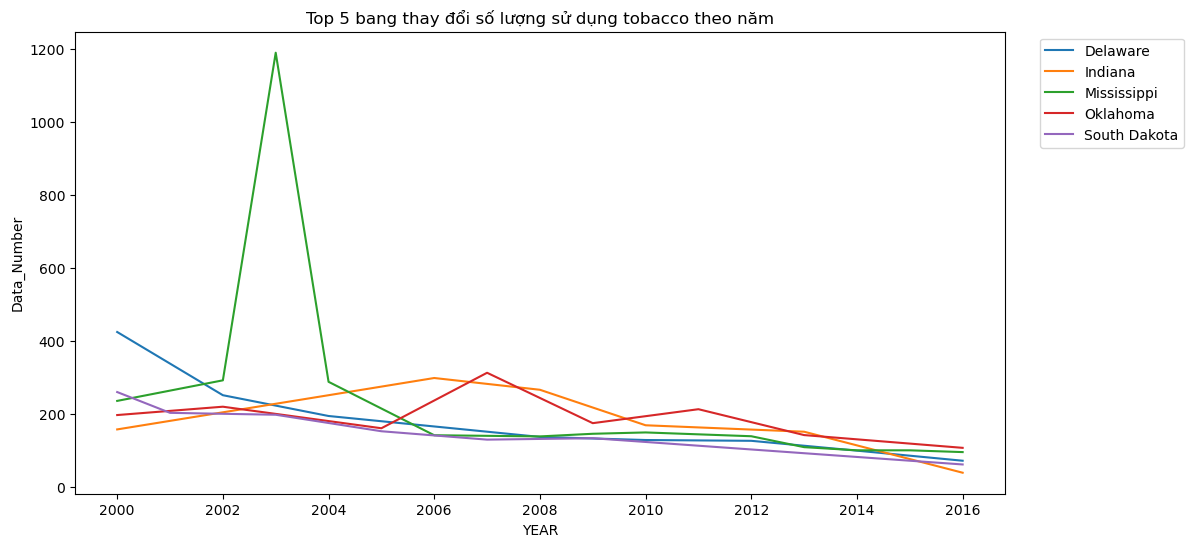

In [114]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='YEAR', y='Data_Number', hue='LocationDesc', data=filtered_locations_df)
plt.title('Top 5 bang thay đổi số lượng sử dụng tobacco theo năm')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

- `Đánh giá`:
    - `Xu hướng giảm`:
        + Tất cả 5 bang đều có xu hướng giảm trong giai đoạn 2000-2016
        + Xu hướng giảm mạnh, giảm khoảng 25% (Oklahoma) tới 75% (Delaware)
    - `Xu hướng tăng`:
        + Giai đoạn 2002-2004 bang `Mississippi` có sự tăng khá lớn, tăng hơn gần 600% tại 2003
        + `Indiana` và `Oklahama` cũng có sự tăng nhẹ ở năm 2006 và 2007
        
- `Lợi ích`:
    - Tìm hiểu lý do các khu vực có sự gia tăng mạnh để có chính sách phù hợp
    - Khuyến khích thêm tại các khu vực có sự giảm mạnh mẽ

## So sánh việc sử dụng tobacco khói (Cigarette) giữa Middle School và High School của Nam và Nữ

#### Thêm cột Data_Number

In [124]:
filtered_data['Data_Number'] = filtered_data['Data_Value'] * filtered_data['Sample_Size'] / 100

#### Lọc ra 2 dataframe Middle School và High School sử dụng Cigarette

In [141]:
# DataFrame Middle Schoool 
middle_df = filtered_data[(filtered_data['Education'] == "Middle School") 
                          & (filtered_data['TopicDesc'] == 'Cigarette Use (Youth)') 
                          & (filtered_data['Gender'] != 'Overall')]

# DataFrame High Schoool 
high_df = filtered_data[(filtered_data['Education'] == "High School") 
                          & (filtered_data['TopicDesc'] == 'Cigarette Use (Youth)')
                          & (filtered_data['Gender'] != 'Overall')]
                        

#### Lấy trung bình các năm theo giới tính

In [143]:
# Lấy trung bình theo giới tính theo năm
# Middle School
avg_middle_gender = middle_df.groupby(['Gender','YEAR'])['Data_Number'].mean().reset_index()
print('Middle School')
print(avg_middle_gender)

print('-----------------------------------------')
# High School
avg_high_gender = high_df.groupby(['Gender','YEAR'])['Data_Number'].mean().reset_index()
print('High School')
print(avg_high_gender)

Middle School
    Gender  YEAR  Data_Number
0   Female  2000   212.421722
1   Female  2001   182.674000
2   Female  2002   174.013600
3   Female  2003   364.349556
4   Female  2004   147.635533
5   Female  2005   134.399500
6   Female  2006   133.600750
7   Female  2007   155.429333
8   Female  2008    94.135933
9   Female  2009   107.275111
10  Female  2010    68.210933
11  Female  2011   135.345333
12  Female  2012    66.817333
13  Female  2013    83.468000
14  Female  2014    63.205333
15  Female  2015    42.378000
16  Female  2016    55.038810
17    Male  2000   220.390333
18    Male  2001   192.133333
19    Male  2002   178.385667
20    Male  2003   404.700556
21    Male  2004   153.330933
22    Male  2005   130.606667
23    Male  2006   146.682417
24    Male  2007   164.454667
25    Male  2008   110.974200
26    Male  2009   116.618667
27    Male  2010    81.871267
28    Male  2011   161.502000
29    Male  2012    71.075917
30    Male  2013    92.560667
31    Male  2014    64.168

#### Visualize

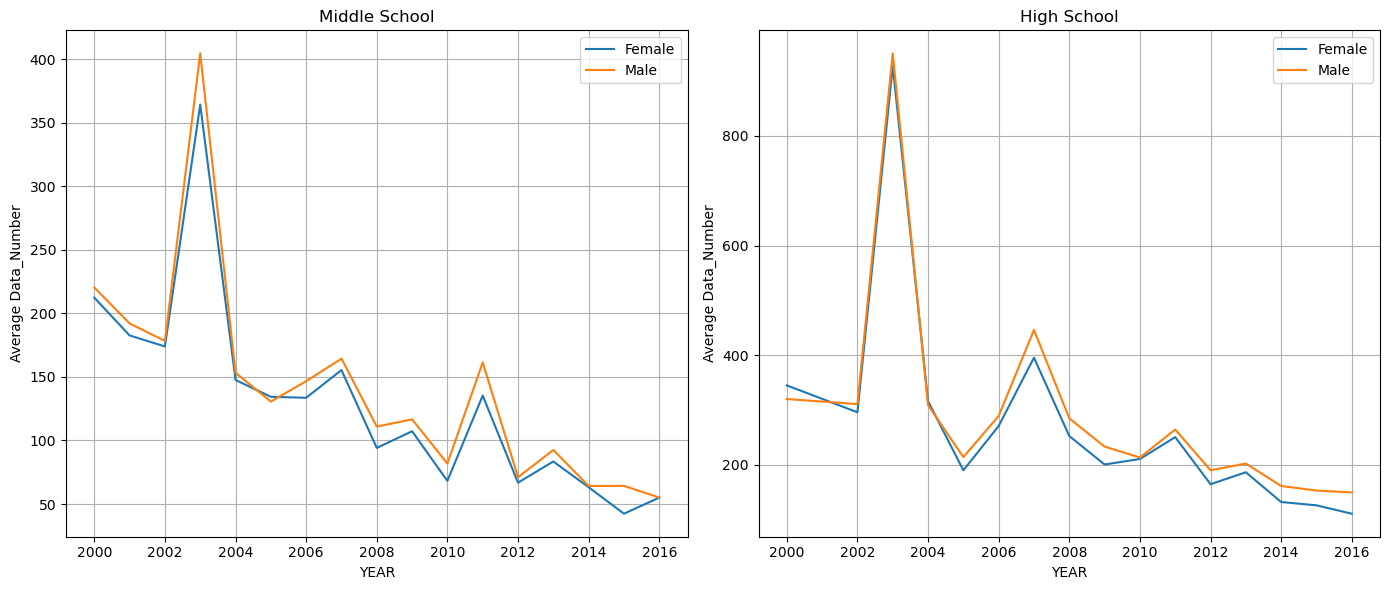

In [146]:
import matplotlib.pyplot as plt

# Tạo figure và hai trục cạnh nhau
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ biểu đồ cho Middle School
for gender in avg_middle_gender['Gender'].unique():
    avg_middle_gender[avg_middle_gender['Gender'] == gender].plot(x='YEAR', y='Data_Number', ax=ax1, label=gender)

ax1.set_title('Middle School')
ax1.set_ylabel('Average Data_Number')
ax1.legend()
ax1.grid(True)

# Vẽ biểu đồ cho High School
for gender in avg_high_gender['Gender'].unique():
    avg_high_gender[avg_high_gender['Gender'] == gender].plot(x='YEAR', y='Data_Number', ax=ax2, label=gender)

ax2.set_title('High School')
ax2.set_ylabel('Average Data_Number')
ax2.legend()
ax2.grid(True)

plt.tight_layout()  # Đảm bảo không bị chồng chéo giữa các biểu đồ
plt.show()


- `Đánh giá`:
    + Nhìn chung việc sử dụng thuốc lá đều có xu hướng giảm ở cả Middle School và High School
    + Lượng tiêu thụ của `Female` nhìn chung đều thấp hơn `Male`. Tuy nhiên ở `High School` vào giao đoạn 2002-2004 số người sử dụng ở cả 2 giới tính là ngang nhau.
    + Giai đoạn 2002-2003 cả 2 cấp độ học vấn đều có sự tăng mạnh
        - Middle School: từ 175 người tăng lên hơn 400 ở nam và hơn 350 ở nữ
        - High School: từ 300 người tăng lên gần 1000 ở cả nam và nữ

## Đổi tên cột 'Data_Value' thành 'Tobacco consumption percentage (%)'

In [ ]:
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

# tính tổng lượng tiêu thụ thuốc lá (%) cho mỗi nhóm 'TopicDesc' 


In [ ]:
data_to_plot = df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum()

## Chỉ lấy các dữ liệu có sử dụng thuốc lá trong dữ liệu khảo sát

In [ ]:
if 'Cessation (Youth)' in data_to_plot:
    data_to_plot = data_to_plot.drop('Cessation (Youth)')

# Vẽ biểu đồ thể hiện tỉ lệ sử dụng "Thuốc lá có khói" và "Thuốc lá không khói" trong toàn bộ dữ liệu khảo sát

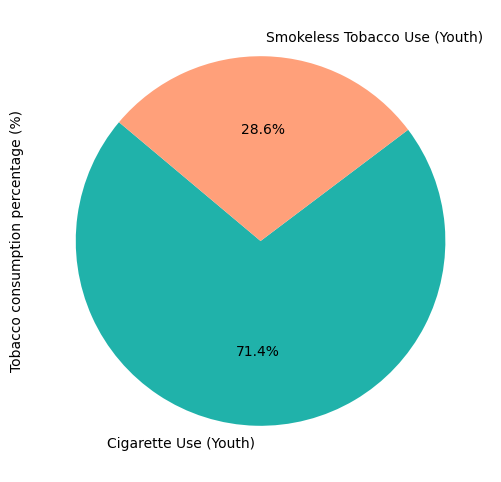

In [ ]:
# Tạo biểu đồ pie
plt.figure(figsize=(6, 6))
data_to_plot.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightseagreen', 'lightsalmon'])
plt.show()


- Đánh giá
    - Trend tiêu dùng thuốc lá: Sự phân bố không đồng đều giữa các phương thức sử dụng thuốc lá. Sự dụng thuốc lá có khói chiếm tỷ lệ cao 71.4%, sử dụng thuốc lá không khói thấp chỉ 28.6%

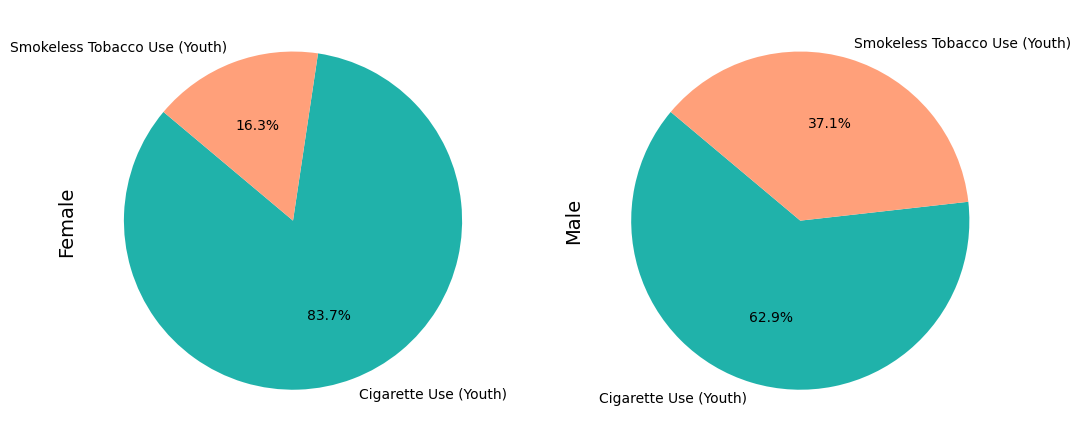

In [ ]:
female_data = df[(df['Gender'] == 'Female') & (df['TopicDesc'] != 'Cessation (Youth)')]
male_data = df[(df['Gender'] == 'Male') & (df['TopicDesc'] != 'Cessation (Youth)')]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['lightseagreen', 'lightsalmon'])
axes[0].set_ylabel('Female', fontsize=14)

male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['lightseagreen', 'lightsalmon'])
axes[1].set_ylabel('Male', fontsize=14)

plt.show()


- Đánh giá:
    - Tỉ lệ sử dụng thuốc lá vẫn chiếm ưu thế trên cả 2 giới tính riêng được khảo sát.
    - Tỉ lệ nữ sử dụng thuốc lá không khói ít hơn ti nam sử dụng thuốc lá không khói (16.3 và 37.1)
    - Có thể thấy rõ tỉ lệ sử dụng các loại thuốc của từng giới tính theo từng loại thuốc.

### Chỉ lựa chọn những khảo sát mà liên quan đến có hút thuốc hoặc hút thuốc không khói.

In [ ]:
# Loại bỏ các dòng có giá trị 'Cessation (Youth)' trong cột 'TopicDesc'
df_filtered = df[df['TopicDesc'] != 'Cessation (Youth)'].copy()


###  Lấy dữ liệu của các cuộc khảo sát trong khoảng 2010 đến năm mới nhất.

In [ ]:

# Lấy năm mới nhất
latest_year = df_filtered['YEAR'].max()

# Lấy các dòng từ năm 2010 đến năm mới nhất
Latest_df = df_filtered.loc[(df_filtered['YEAR'] >= 2010) & (df_filtered['YEAR'] <= latest_year)].copy()


## Tính giá trị trung bình về việc sử dụng các loại thuốc của từng vùng trên những lần khảo sát. 

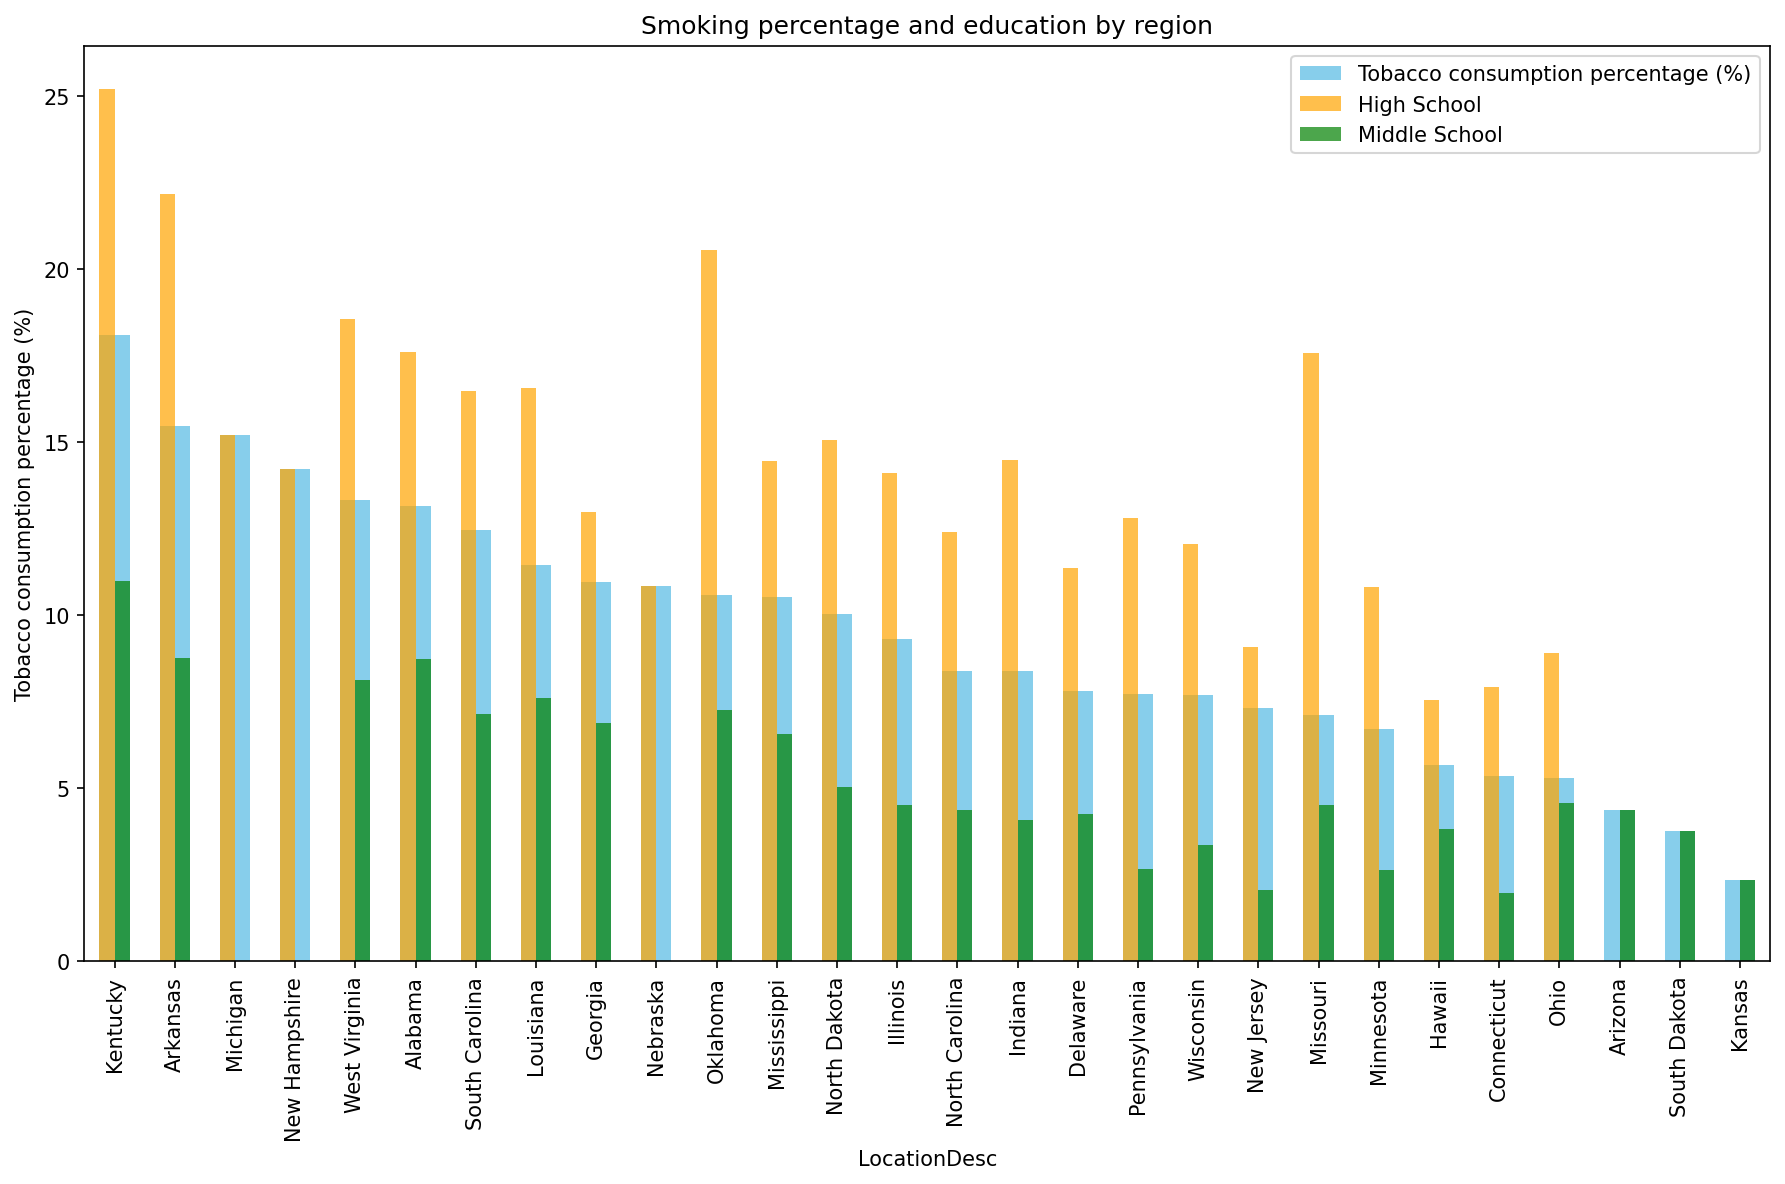

In [ ]:
region_smoking = Latest_df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)
education_smoking = Latest_df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack().reindex(region_smoking.index)
plt.figure(figsize=(12, 8), dpi=150)
region_smoking.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education_smoking.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)  
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

- Đánh giá:
    - Nhìn chung tỉ lệ giữa việc hút các loại thuốc theo trình độ học vấn có sự chênh lệnh lớn. Hút thuốc ở cấp bậc Hight School chiếm tỉ lệ cao, thường sẽ gấp 2 lần Middle School.
    - Có vài trường hợp cá biệt là chỉ ghi nhận việc hút các loại thuốc ở Middle School.
    - Có thể nhìn được tình hình phân cấp của những người sử dụng các loại thuốc theo độ tuổi. (Vì Education liên quan tới Age)

#### Lọc ra các dòng dữ liệu về các khảo sát vào khoảng thời gian khảo sát từ 2000 - 2016: 

In [ ]:
tobacco_df = tobacco_df[tobacco_df['YEAR'] >= 2000]
tobacco_df = tobacco_df[tobacco_df['YEAR'] <= 2016]
# Thêm cột giá trị từ phần trăm và số lượng mẫu thử 
tobacco_df['Data_Number'] = tobacco_df['Data_Value'] * tobacco_df['Sample_Size'] / 100
tobacco_df.head(5)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder,Data_Number
0,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8,312.612
1,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS09,9,37.968
4,2004,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11,164.268
6,2014,AL,Alabama,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12,20.925
8,2010,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS08,8,131.080


## Sự khác nhau về loại thuốc lá sử dụng ở High School và Middle School

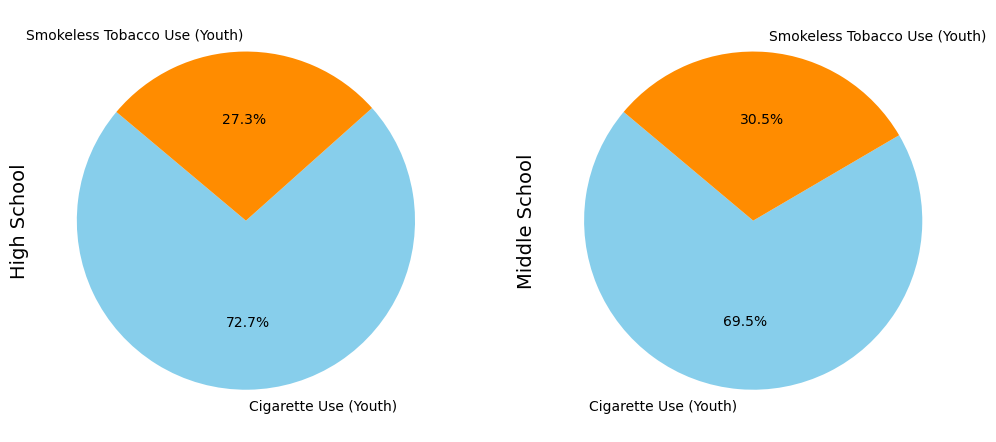

In [ ]:
HighSchool_data = tobacco_df[(tobacco_df['Education'] == 'High School')
                            & (tobacco_df['Gender'] != 'Overall')]
MiddleSchool_data = tobacco_df[(tobacco_df['Education'] == 'Middle School')
                              & (tobacco_df['Gender'] != 'Overall')]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
HighSchool_data.groupby('TopicDesc')['Data_Value'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['skyblue', 'darkorange'])
axes[0].set_ylabel('High School', fontsize=14)

MiddleSchool_data.groupby('TopicDesc')['Data_Value'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['skyblue', 'darkorange'])
axes[1].set_ylabel('Middle School', fontsize=14);

- Từ biểu đồ trên ta hiểu được rằng trong khoảng thời gian từ 2000 - 2016, đối với các mẫu thử không phân biệt về giá trị của cột **Gender** thì ở **High School** thuốc lá không khói ít phổ biến hơn ở **Middle School**

## Sự thay đổi về loại thuốc lá được lựa chọn để tiêu thụ từ năm 2000 - 2016

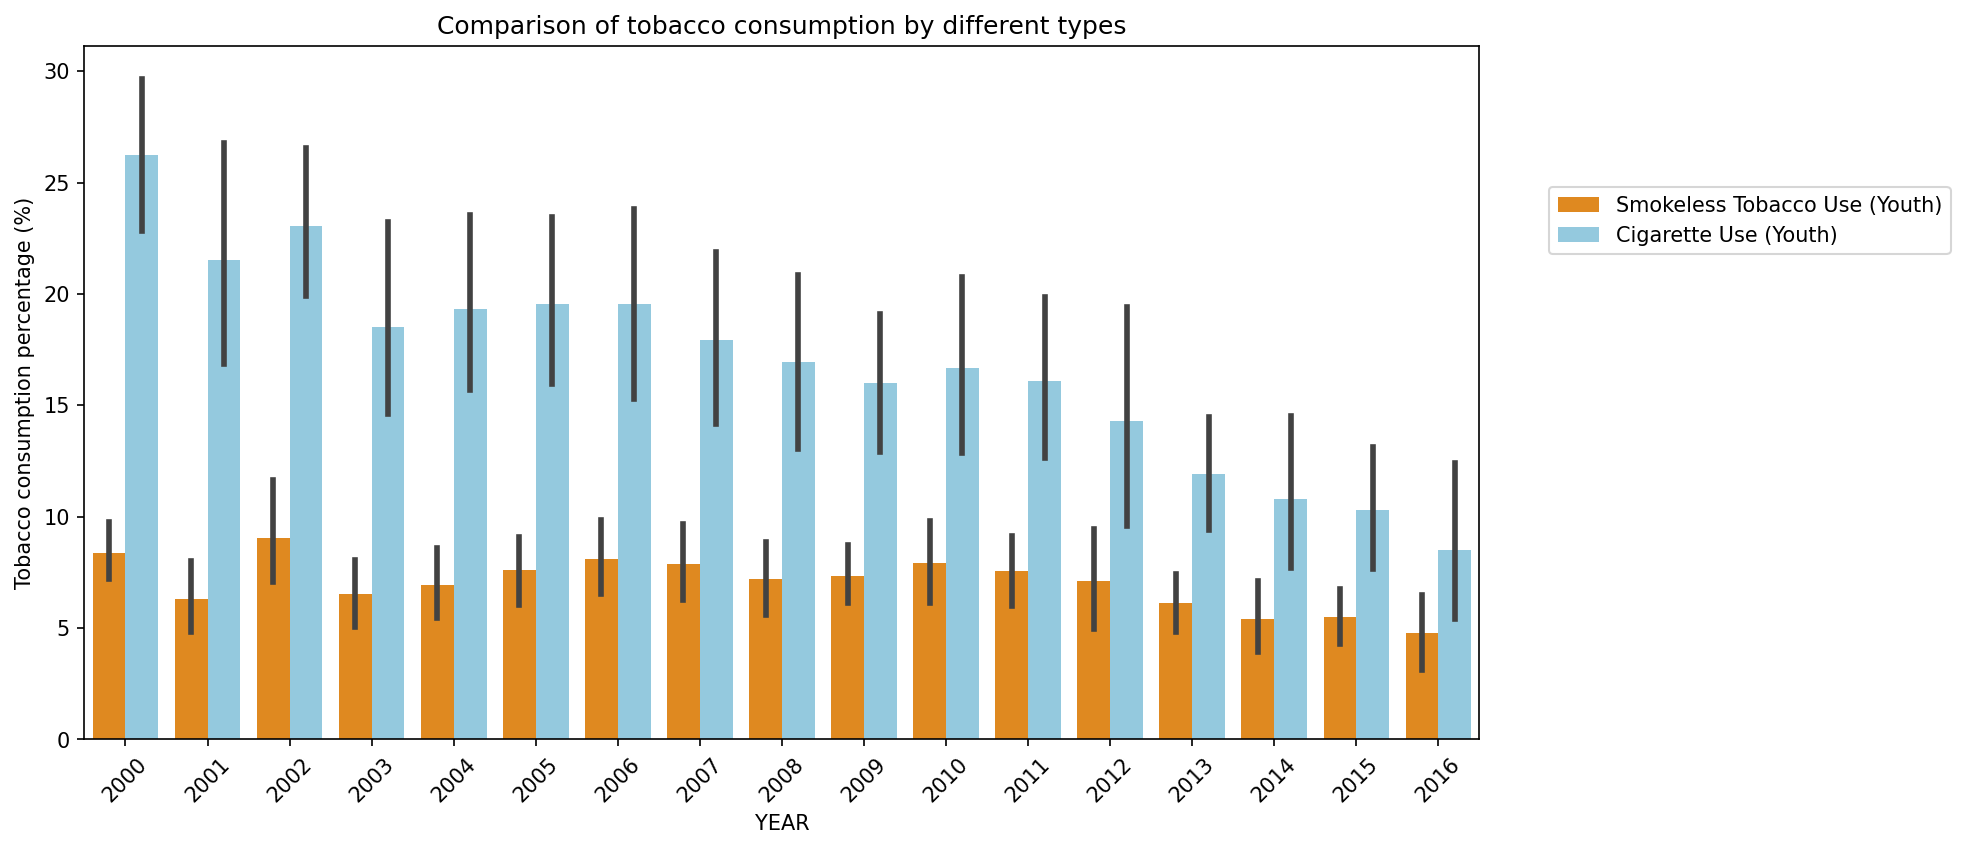

In [ ]:
# Lọc các khảo sát không có quy định về giới tính
tobacco_df = tobacco_df[tobacco_df['Gender'] == 'Overall']

# Chọn màu cho các cột
palette_colors = {
    "Cigarette Use (Youth)": "skyblue",
    "Smokeless Tobacco Use (Youth)": "darkorange",
}

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(data=tobacco_df, x='YEAR', y='Data_Value', hue='TopicDesc', palette = palette_colors)
plt.xlabel('YEAR')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Сomparison of tobacco consumption by different types')
plt.xticks(rotation=45)
plt.legend(title='TopicDesc')
plt.legend(loc=(1.05, 0.7));

Từ Barrplot trên ta nhận thấy rằng:

- **Smokeless Tobacco** không có sự thay đổi quá lớn theo thời gian
- **Cigarette** đang dần giảm đi theo thời gian